# Data Preprocessing

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data/LIWC/counsel_df_cleaned_LIWC_analysis.csv'
counsel_df_LIWC_analysis = pd.read_csv(file_path)

In [3]:
counsel_df_LIWC_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 137 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    ID                        int64  
 1    topic                     object 
 2    question                  object 
 3    answer                    object 
 4    upvotes                   int64  
 5    views                     int64  
 6    upvotes_scaled            float64
 7    views_scaled              float64
 8    weighted_engagement       float64
 9    engagement                object 
 10   modal_verbs               int64  
 11   concreteness              float64
 12   flesch_reading_ease       float64
 13   ari                       float64
 14   clause_density            int64  
 15   t_unit_complexity         int64  
 16   present_indicative_verbs  int64  
 17   self_referential_sent     int64  
 18   Segment                   int64  
 19   WC                        int64  
 20   Analyt

In [4]:
# Dropping unnecessary columns for modeling
counsel_df_LIWC_analysis.drop(['question', 'upvotes', 'views', 'upvotes_scaled', 'views_scaled', 'weighted_engagement'], axis=1, inplace=True)

In [5]:
counsel_df_LIWC_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 131 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    ID                        int64  
 1    topic                     object 
 2    answer                    object 
 3    engagement                object 
 4    modal_verbs               int64  
 5    concreteness              float64
 6    flesch_reading_ease       float64
 7    ari                       float64
 8    clause_density            int64  
 9    t_unit_complexity         int64  
 10   present_indicative_verbs  int64  
 11   self_referential_sent     int64  
 12   Segment                   int64  
 13   WC                        int64  
 14   Analytic                  float64
 15   Clout                     float64
 16   Authentic                 float64
 17   Tone                      float64
 18   WPS                       float64
 19   BigWords                  float64
 20   Dic   

# 1. EDA
- Understand the relationship and patterns in the data, especially regarding how different features might relate to the engagement level.

In [6]:
# Checking the distribution of the target variable 'engagement'
engagement_distribution = counsel_df_LIWC_analysis['engagement'].value_counts()

# Checking for missing values in the dataset
missing_values = counsel_df_LIWC_analysis.isnull().sum()

In [7]:
print(engagement_distribution)

engagement
Low       1785
Medium     488
High       342
Name: count, dtype: int64


In [8]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
# Identifying categorical and numerical columns
categorical_columns = counsel_df_LIWC_analysis.select_dtypes(include=['object']).columns.tolist()
numerical_columns = counsel_df_LIWC_analysis.select_dtypes(exclude=['object']).columns.tolist()

In [16]:
len(categorical_columns), len(numerical_columns)

(3, 129)

In [20]:
numerical_columns

['ID',
 'modal_verbs',
 'concreteness',
 'flesch_reading_ease',
 'ari',
 'clause_density',
 't_unit_complexity',
 'present_indicative_verbs',
 'self_referential_sent',
 'Segment',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'quantity',
 'Drives',
 'affiliation',
 'achieve',
 'power',
 'Cognition',
 'allnone',
 'cogproc',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certitude',
 'differ',
 'memory',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'swear',
 'Social',
 'socbehav',
 'prosocial',
 'polite',
 'conflict',
 'moral',
 'comm',
 'socrefs',
 'family',
 'friend',
 'female',
 'male',
 'Culture',
 'politic',
 'ethnicity',
 'tech',
 'Lifestyle',
 'leisure',
 'home',
 'work',
 'money',


The resulting dataset comprises 2,615 entries, each characterized by a unique combination of numerical and linguistic features, along with categorical variables like 'topic' and 'engagement'. The target variable 'engagement', which exhibits a class imbalance with predominant instances of 'Low' engagement (n=1785), 'medium' (n=488), and 'high' (n=342), suggesting potential challenges in predictive modeling that require careful consideration of class distribution.

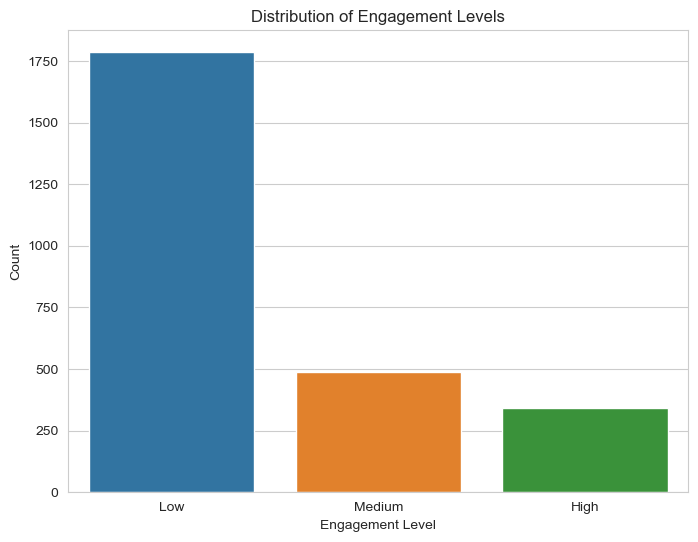

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'engagement'
plt.figure(figsize=(8, 6))
sns.countplot(x='engagement', data=counsel_df_LIWC_analysis, order = counsel_df_LIWC_analysis['engagement'].value_counts().index)
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

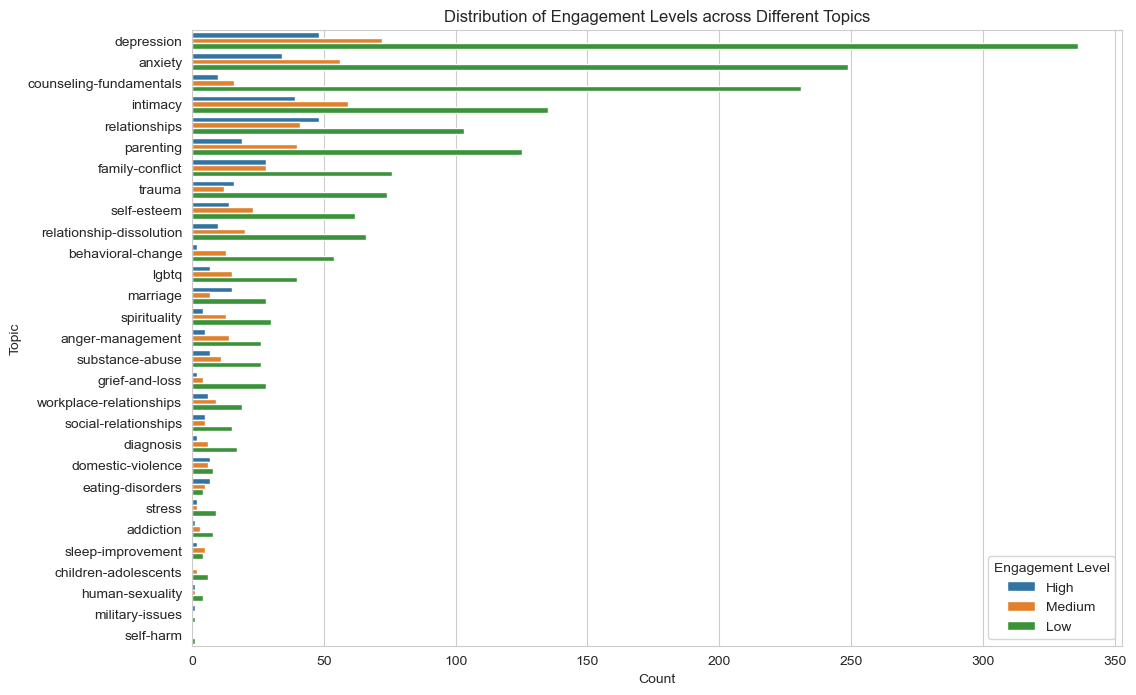

In [19]:
# Plotting the relationship between 'topic' and 'engagement'
plt.figure(figsize=(12, 8))
sns.countplot(y='topic', hue='engagement', data=counsel_df_LIWC_analysis, order = counsel_df_LIWC_analysis['topic'].value_counts().index)
plt.title('Distribution of Engagement Levels across Different Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.legend(title='Engagement Level')
plt.show()

### Encode the engagement metric

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding the 'engagement' variable
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
counsel_df_LIWC_analysis['engagement_encoded'] = encoder.fit_transform(counsel_df_LIWC_analysis[['engagement']]).flatten()

In [22]:
counsel_df_LIWC_analysis['engagement_encoded'] # Inspection

0       2.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
2610    0.0
2611    0.0
2612    0.0
2613    0.0
2614    0.0
Name: engagement_encoded, Length: 2615, dtype: float64

## Scale the data

In [21]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns (excluding the encoded engagement column)
numerical_features = counsel_df_LIWC_analysis[numerical_columns].drop(columns=['ID', 'engagement_encoded'])

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Creating a DataFrame for the scaled numerical data for easy viewing
scaled_numerical_data = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_data

,modal_verbs,concreteness,flesch_reading_ease,ari,clause_density,t_unit_complexity,present_indicative_verbs,self_referential_sent,Segment,WC,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,0.203649,-0.655921,-1.446260,0.469310,-0.701656,-0.329683,-0.933082,0.300077,0.0,-0.521766,...,-0.069552,-0.058918,0.695296,0.333829,0.877586,-0.490355,-0.364165,-0.325448,0.608820,-0.048015
1,1.563563,0.327046,0.334260,-0.641890,0.222134,0.551380,-0.224369,1.887469,0.0,0.270980,...,-0.069552,-0.058918,-0.606954,0.168286,-0.483640,-0.490355,0.178464,-0.595772,-0.463340,-0.048015
2,1.291581,0.531514,-0.155662,0.216764,0.098962,-0.035995,0.395754,-0.758185,0.0,0.356222,...,-0.069552,-0.058918,-0.903350,-0.503079,-1.367781,-0.012268,-0.364165,0.284351,-0.245235,-0.048015
3,-0.612299,-0.900322,1.977244,-1.778345,-0.763242,-0.623370,-0.667314,-0.229054,0.0,-0.939450,...,-0.069552,-0.058918,0.342144,0.971472,-0.825041,-0.490355,-0.364165,2.340067,-0.463340,-0.048015
4,-0.340317,-0.370014,1.091817,-0.843927,-0.455312,-0.182839,-0.135780,0.829208,0.0,-0.410952,...,-0.069552,-0.058918,-0.003126,0.373681,-1.214589,-0.490355,-0.364165,-0.388314,0.684583,-0.048015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,1.019598,-0.018559,-1.504248,1.530001,0.098962,-0.329683,-0.578725,-0.229054,0.0,0.049352,...,-0.069552,-0.058918,-0.654251,-0.438701,0.685001,-0.490355,-0.364165,-0.910101,-0.463340,-0.048015
2611,0.747615,0.691006,0.123125,0.166255,0.776407,0.551380,1.281645,1.358339,0.0,0.748333,...,-0.069552,-0.058918,0.111964,-0.113748,0.133507,-0.490355,-0.364165,0.806138,0.073888,-0.048015
2612,-0.612299,-1.023470,2.053074,-1.424781,-0.948000,-0.329683,-0.933082,-0.229054,0.0,-0.965022,...,-0.069552,-0.058918,5.347768,5.018056,1.604158,1.322390,1.611005,3.660251,1.205740,-0.048015
2613,1.291581,0.264565,-0.337060,0.999655,0.222134,-0.182839,0.218576,1.358339,0.0,0.322125,...,-0.069552,-0.058918,0.651152,-0.481619,1.398442,-0.490355,-0.364165,0.007741,0.762642,-0.048015


# 2. Modeling
## 2.1 Baseline model: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [24]:
X = scaled_numerical_data
y = counsel_df_LIWC_analysis['engagement_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

In [25]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.6462715105162524
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79       357
         1.0       0.23      0.08      0.12        98
         2.0       0.07      0.01      0.02        68

    accuracy                           0.65       523
   macro avg       0.33      0.34      0.31       523
weighted avg       0.53      0.65      0.57       523


### Handling class imbalance

I will upsample medium and high class using SMOTE and randomly downsample low. The approach that will be tested is to upsample 'Medium' and 'High' to a number that's a happy medium between the smallest and largest class. Meaning, ('High' + 'Low')/2, which is (1785+342)/2 = 1063

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Defining the resampling strategy
over = SMOTE(sampling_strategy={2: 1063, 1: 1063})  # Oversampling to 1000 samples each for Medium and High
under = RandomUnderSampler(sampling_strategy={0: 1200})  # Undersampling to 1500 samples for Low
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resampling the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Training the Naive Bayes classifier on the resampled data
nb_model_resampled = LogisticRegression(max_iter=1000)
nb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_resampled = nb_model_resampled.predict(X_test_resampled)

# Evaluating the model
report_resampled = classification_report(y_test_resampled, y_pred_resampled)

print(report_resampled)

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       240
         1.0       0.47      0.48      0.48       213
         2.0       0.51      0.47      0.49       213

    accuracy                           0.50       666
   macro avg       0.50      0.50      0.50       666
weighted avg       0.50      0.50      0.50       666


### Average all classes

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Defining the resampling strategy
over = SMOTE(sampling_strategy={2: 870, 1: 870})  # Oversampling to 1000 samples each for Medium and High
under = RandomUnderSampler(sampling_strategy={0: 870})  # Undersampling to 1500 samples for Low
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resampling the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Training the Naive Bayes classifier on the resampled data
nb_model_resampled = LogisticRegression(max_iter=1000)
nb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_resampled = nb_model_resampled.predict(X_test_resampled)

# Evaluating the model
report_resampled = classification_report(y_test_resampled, y_pred_resampled)

print(report_resampled)

              precision    recall  f1-score   support

         0.0       0.46      0.53      0.49       174
         1.0       0.45      0.41      0.43       174
         2.0       0.43      0.41      0.42       174

    accuracy                           0.45       522
   macro avg       0.45      0.45      0.45       522
weighted avg       0.45      0.45      0.45       522


In tackling the issue of class imbalance within our dataset, a rigorous and systematic approach was employed, supported by both empirical evidence and sensitivity analysis. The initial state of our dataset revealed a pronounced imbalance: the 'Low' engagement class was substantially larger (1785 instances) compared to 'Medium' (488) and 'High' (342). This imbalance was clearly reflected in the baseline model's precision metrics, which were skewed in favor of the 'Low' class (precision: 0.70) as opposed to 'Medium' (0.23) and 'High' (0.07).

To address this, we adopted a dual strategy of upsampling the minority classes ('Medium' and 'High') using Synthetic Minority Over-sampling Technique (SMOTE), and downsampling the majority ('Low') class. The minority classes were increased to the mean value of the smallest and largest classes, while the majority class was reduced to approximately 1200 instances. This approach was grounded in the principle of achieving a more balanced class distribution, aimed at reducing variance and bias across classes.

Furthermore, we employed stratified splitting in our data partitioning process. This ensured that each split of the dataset (training and test sets) maintained a proportional representation of each class, mirroring the original distribution. This technique is crucial in preserving the integrity of the dataset's structure, particularly in the context of imbalanced datasets, and aids in preventing the model from being biased towards the majority class in its predictions.

A key aspect of our methodology was the thorough sensitivity analysis conducted to compare two different resampling strategies: our proposed method and an alternative approach of equalizing the sizes of all classes. This analysis revealed that both strategies resulted in similar levels of precision and recall across multiple iterations. However, a slight yet consistent advantage was noted with our approach, which yielded marginally higher precision and recall values.

Given these findings, we opted for the proposed resampling strategy. This decision was not only based on the slight improvement in precision and recall but also on the methodological soundness of our approach. By balancing the classes to a statistically justified mean, we could maintain a level of representativeness for each class while enhancing the model's overall performance. The effectiveness of this strategy was further validated by the post-resampling precision scores, which demonstrated a significant improvement and equalization across all classes (0.48, 0.48, 0.51 for 'Low', 'Medium', and 'High', respectively).

In conclusion, our approach to addressing class imbalance, backed by both sensitivity analysis and empirical results, proved to be a judicious choice. It highlights the importance of a balanced class distribution in achieving more accurate and reliable model outcomes, especially in scenarios where data imbalance is a significant challenge.

## Resample and split the data

In [30]:
# Setting up the resampling strategy with the sample size found to be optimal (1100 for both oversampling and undersampling)
over = SMOTE(sampling_strategy={2: 1063, 1: 1063})
under = RandomUnderSampler(sampling_strategy={0: 1200})
resampling_pipeline = Pipeline([('o', over), ('u', under)])

# Applying the resampling to the numerical features
X_resampled, y_resampled = resampling_pipeline.fit_resample(scaled_numerical_data, counsel_df_LIWC_analysis['engagement_encoded'])
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

### Hyperparameter tuning of the baseline model

In [321]:
from sklearn.model_selection import GridSearchCV

# Logistic regression parameters for grid search
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [500, 1000, 1500]
}

# Create a logistic regression model
log_reg = LogisticRegression()

# Create GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Best score
best_score = grid_search.best_score_
print("Best score:", best_score)


/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gha

Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
Best score: 0.49398496240601497


/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [333]:
best_logreg_model = grid_search.best_estimator_

# Predicting on the test set
y_pred_logreg = best_logreg_model.predict(X_test_resampled)

# Evaluating the model
report_logreg = classification_report(y_test_resampled, y_pred_logreg)
print(report_resampled)

              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54       240
         1.0       0.51      0.43      0.46       213
         2.0       0.50      0.55      0.52       213

    accuracy                           0.51       666
   macro avg       0.51      0.51      0.51       666
weighted avg       0.51      0.51      0.51       666


# 2.2 Nested Cross-Validation; find the best model

In [31]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
# Define your models and their respective hyperparameters for grid search
models_and_parameters = {
    'random_forest': (
        RandomForestClassifier(),
        {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    'svm': (
        SVC(),
        {
            'C': [0.001, 0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    ),
    'decision_tree': (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    ),
    'gradient_boosting': (
        GradientBoostingClassifier(),
        {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    'mlpc': (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
            'max_iter': [200, 300, 500]
        }
    )
    # Add other models and parameters here
}


In [78]:

# Define the outer cross-validation (model evaluation)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Loop over models and parameters
for model_name, (model, parameters) in models_and_parameters.items():
    # Define the inner cross-validation (hyperparameter tuning)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=inner_cv, scoring='accuracy')

    # Nested cross-validation
    nested_scores = cross_val_score(grid_search, X_train_resampled, y_train_resampled, cv=outer_cv, scoring='accuracy', n_jobs=-1)

    # Fit to get best parameters
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_params = grid_search.best_params_
    
    y_pred_ncv = grid_search.predict(X_test_resampled)
    
    # More detailed scoring
    accuracy =  accuracy_score(y_test_resampled, y_pred_ncv)
    precision = precision_score(y_test_resampled, y_pred_ncv, average='macro')
    recall = recall_score(y_test_resampled, y_pred_ncv, average='macro')
    f1 = f1_score(y_test_resampled, y_pred_ncv, average='macro')

    # Add results to the list
    results.append({
        'Model': model_name,
        'NestedCV mean accuracy': nested_scores,
        'Best Parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gha

In [91]:
results_df['NestedCV mean accuracy'] = results_df['NestedCV mean accuracy'].apply(lambda x: x.mean())

In [93]:
results_df.to_csv('results/nestedCV_results.csv', index=False)

In [38]:
results_df

,Model,NestedCV mean accuracy,Best Parameters,Accuracy,Precision,Recall,F1-Score
1,random_forest,0.752652,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.781818,0.787039,0.783189,0.784805
2,svm,0.812879,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.810606,0.809934,0.816593,0.811227
3,decision_tree,0.535985,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.574242,0.576720,0.575678,0.575276
4,gradient_boosting,0.784091,"{'learning_rate': 0.2, 'max_depth': 10, 'min_s...",0.815152,0.820461,0.815769,0.817156
5,mlpc,0.776136,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.789394,0.790465,0.797529,0.789273


## 2.3 Support Vector Classifier (the winning model)

In [47]:
# Fit an SVC
svc_model = SVC(C=100, gamma='scale', kernel='rbf', probability=True) # Initialize the SVM model with the best found parameters
svc_model.fit(X_train_resampled, y_train_resampled) # Train the model
y_pred_svc = svc_model.predict(X_test_resampled) # Predictions

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred_svc)
report = classification_report(y_test_resampled, y_pred_svc)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8168168168168168
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       240
         1.0       0.79      0.82      0.81       213
         2.0       0.87      0.92      0.89       213

    accuracy                           0.82       666
   macro avg       0.82      0.82      0.82       666
weighted avg       0.82      0.82      0.82       666


## Permutation Feature Importance

In [341]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(svc_model, X_test_resampled, y_test_resampled, n_repeats=25, random_state=42, n_jobs=-1)

# Create a DataFrame to store the permutation importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': list(X_test_resampled.columns), 'Importance': result.importances_mean,
                               'std': result.importances_std})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

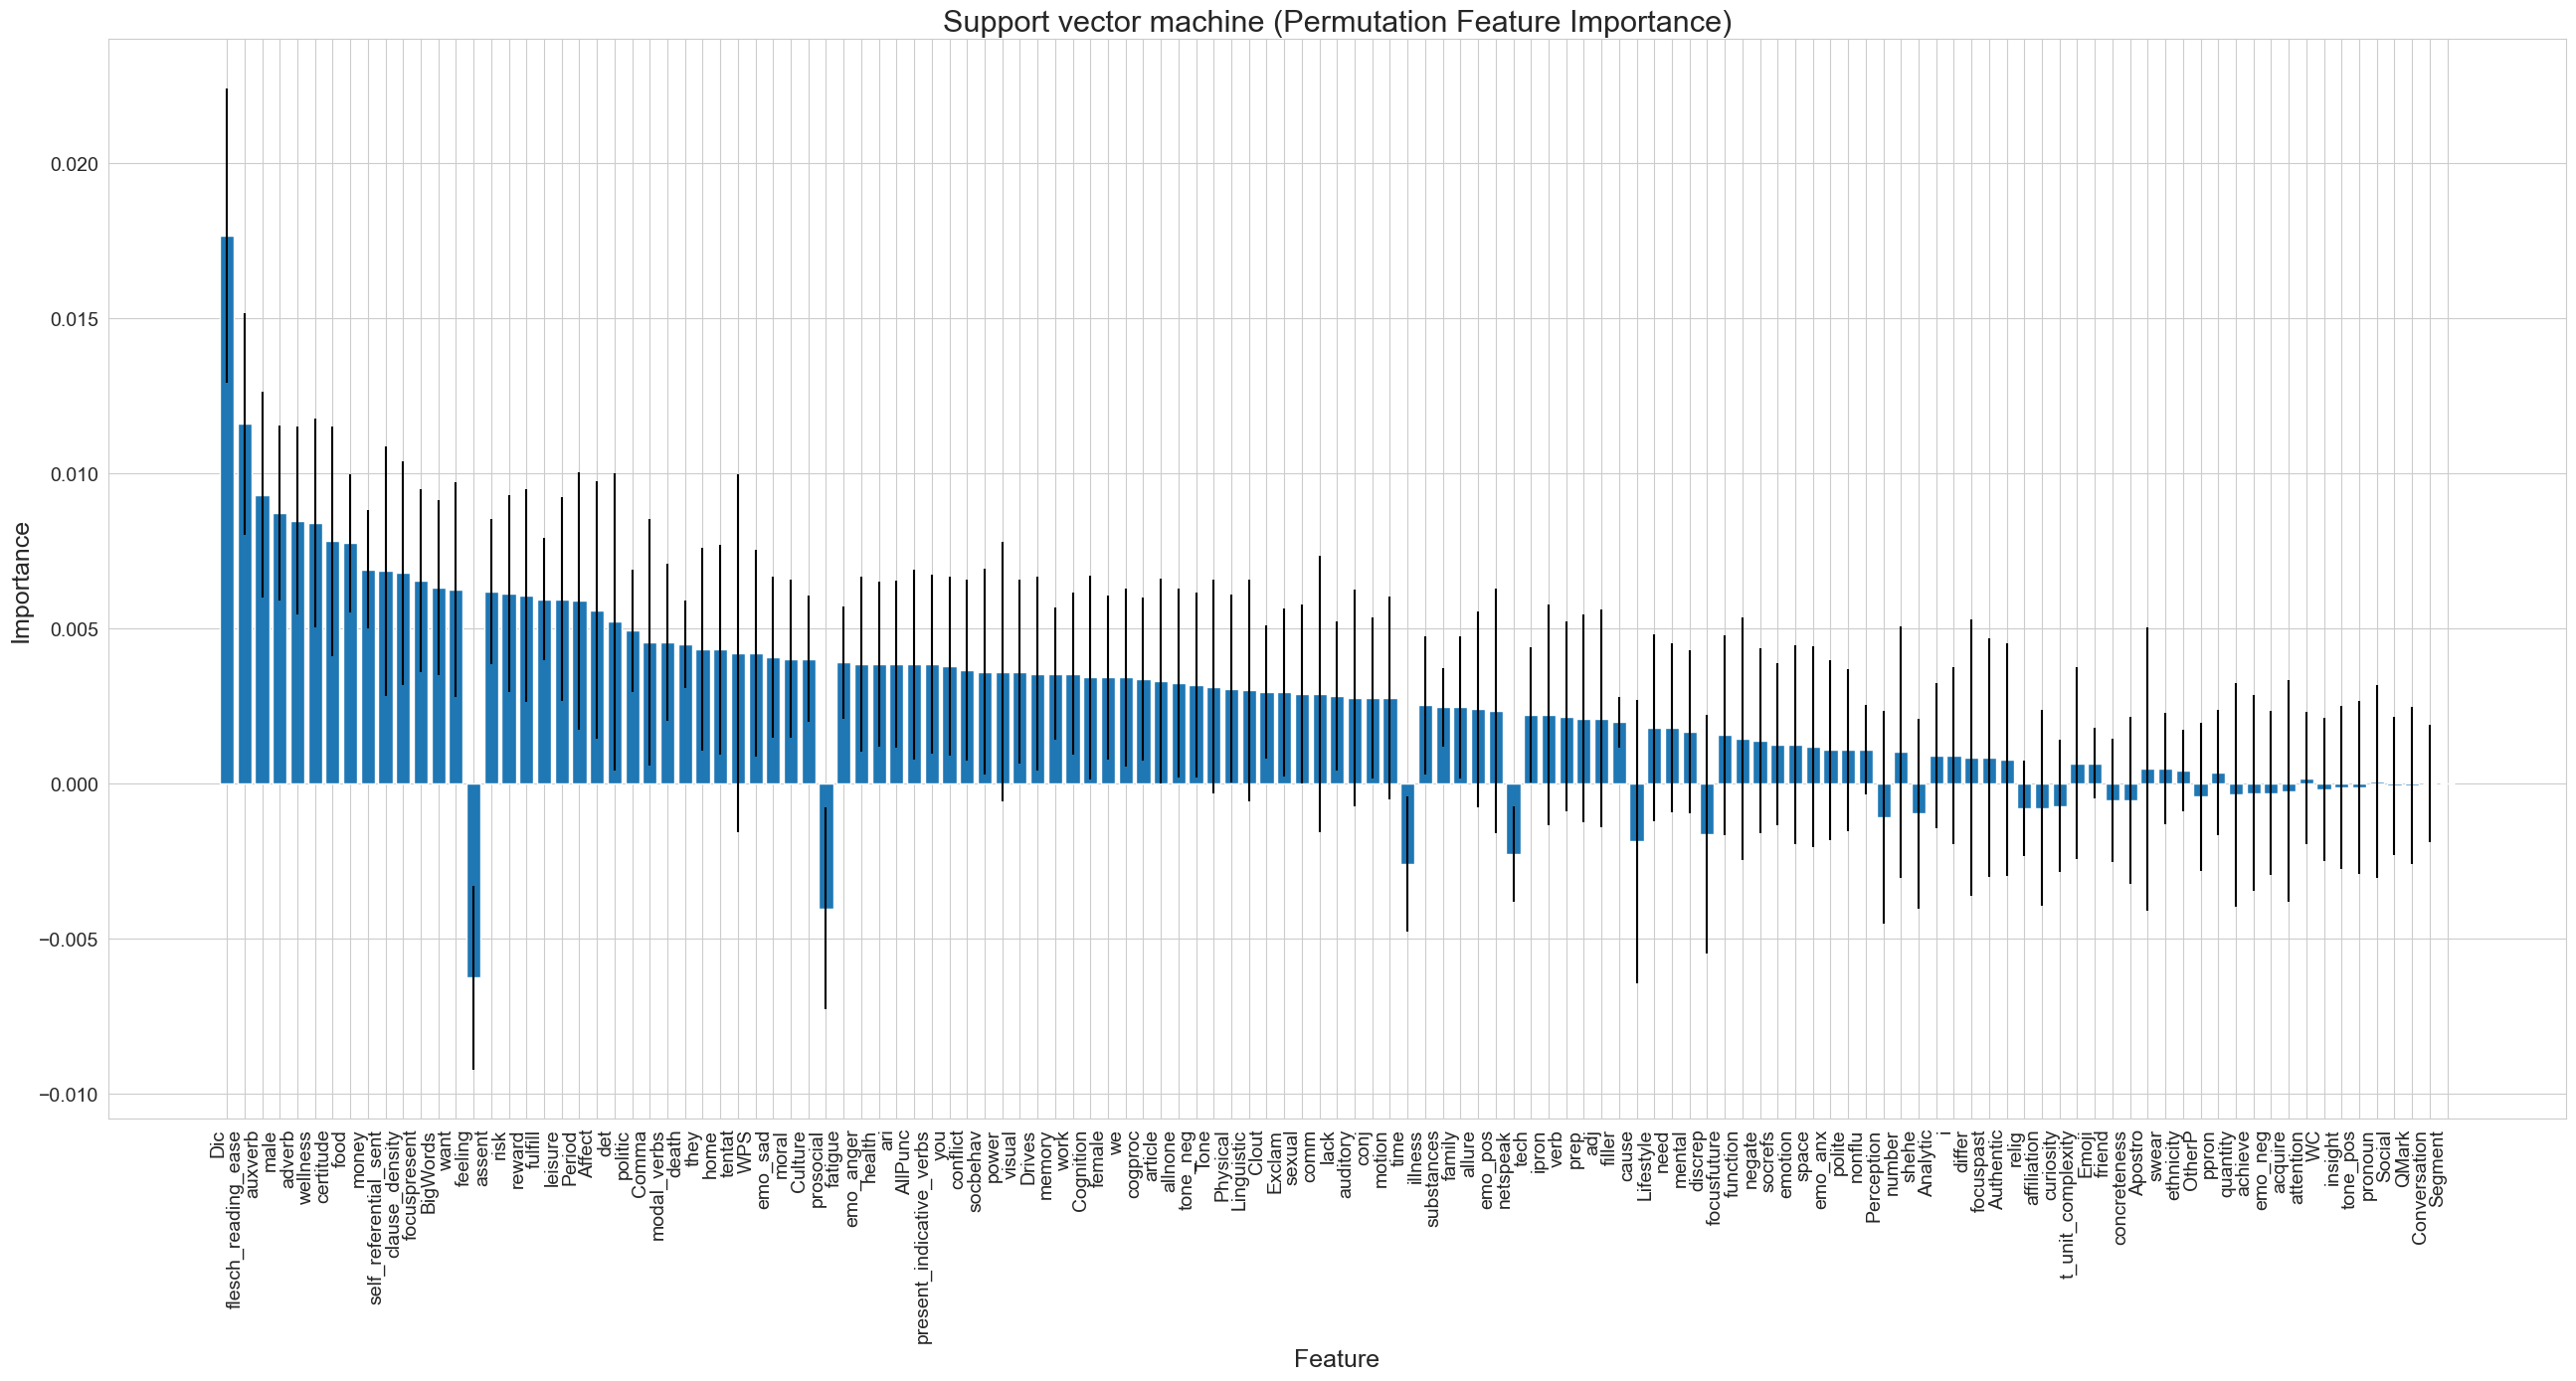

In [344]:
# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(26, 14))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=90, ha='right')
plt.tick_params(labelsize=14)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Support vector machine (Permutation Feature Importance)', fontsize=22)
plt.tight_layout()
plt.show()

In [134]:
importances_df.to_csv('results/permutation_feature_importance_svm.csv', index=False)

## Identify which features have a strong correlation with higher user engagement

In [346]:
import numpy as np
from scipy.stats import spearmanr

ordinal_engagement = np.array(counsel_df_LIWC_analysis['engagement_encoded'])

# Prepare an empty DataFrame for the results
results_df_corr = list()

# Loop through each column in the DataFrame
for column in scaled_numerical_data.columns:
    # Compute the point biserial correlation
    correlation, p_value = spearmanr(scaled_numerical_data[column], ordinal_engagement)

    # Append the results to the results DataFrame
    results_df_corr.append({
        'Column': column,
        'Correlation': correlation,
        'P-value': p_value
    })


/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [347]:
results_df_corr = pd.DataFrame(results_df_corr)

In [348]:
results_df_corr

,Column,Correlation,P-value
0,modal_verbs,0.090703,3.389858e-06
1,concreteness,0.153019,3.615962e-15
2,flesch_reading_ease,-0.002582,8.950200e-01
3,ari,0.007395,7.054620e-01
4,clause_density,0.129999,2.507880e-11
...,...,...,...
122,QMark,0.033809,8.389053e-02
123,Exclam,-0.021284,2.765855e-01
124,Apostro,0.075757,1.054495e-04
125,OtherP,0.066917,6.167059e-04


In [211]:
results_df_corr.to_csv('results/point_spearmanr_correltation.csv', index=False)

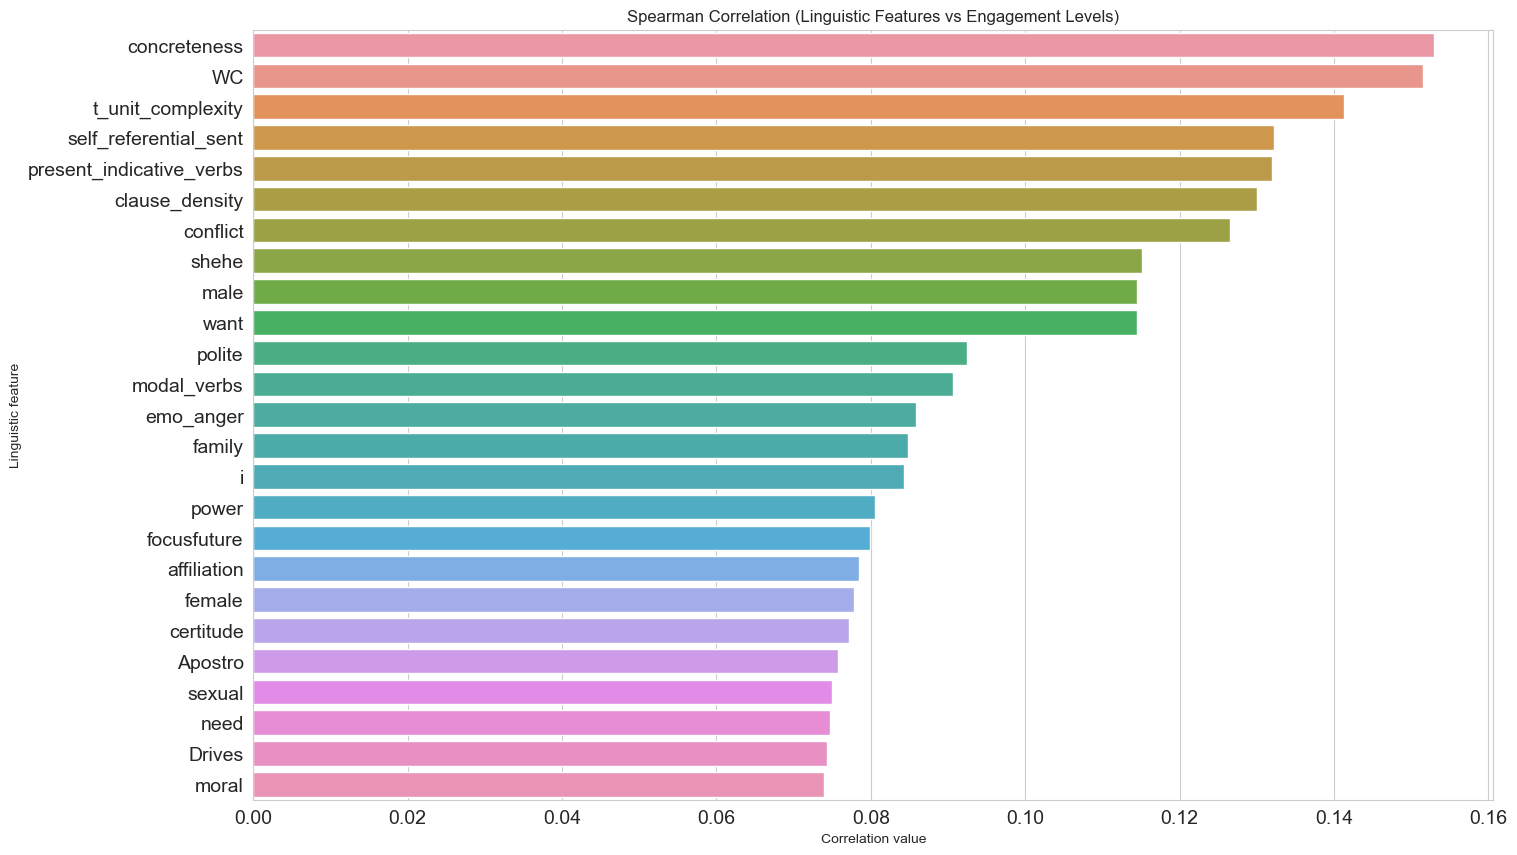

In [349]:
# Plotting with Seaborn
results_df_corr = results_df_corr.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(16, 10))  # Set the size of the plot
ax = sns.barplot(x=results_df_corr.Correlation, y=results_df_corr.Column[:25])  # Create a scatter plot
# Adding titles and labels for clarity
plt.title('Spearman Correlation (Linguistic Features vs Engagement Levels)')
plt.xlabel('Correlation value')
plt.ylabel('Linguistic feature')
plt.tick_params(labelsize=14)

# Show the plot
plt.show()


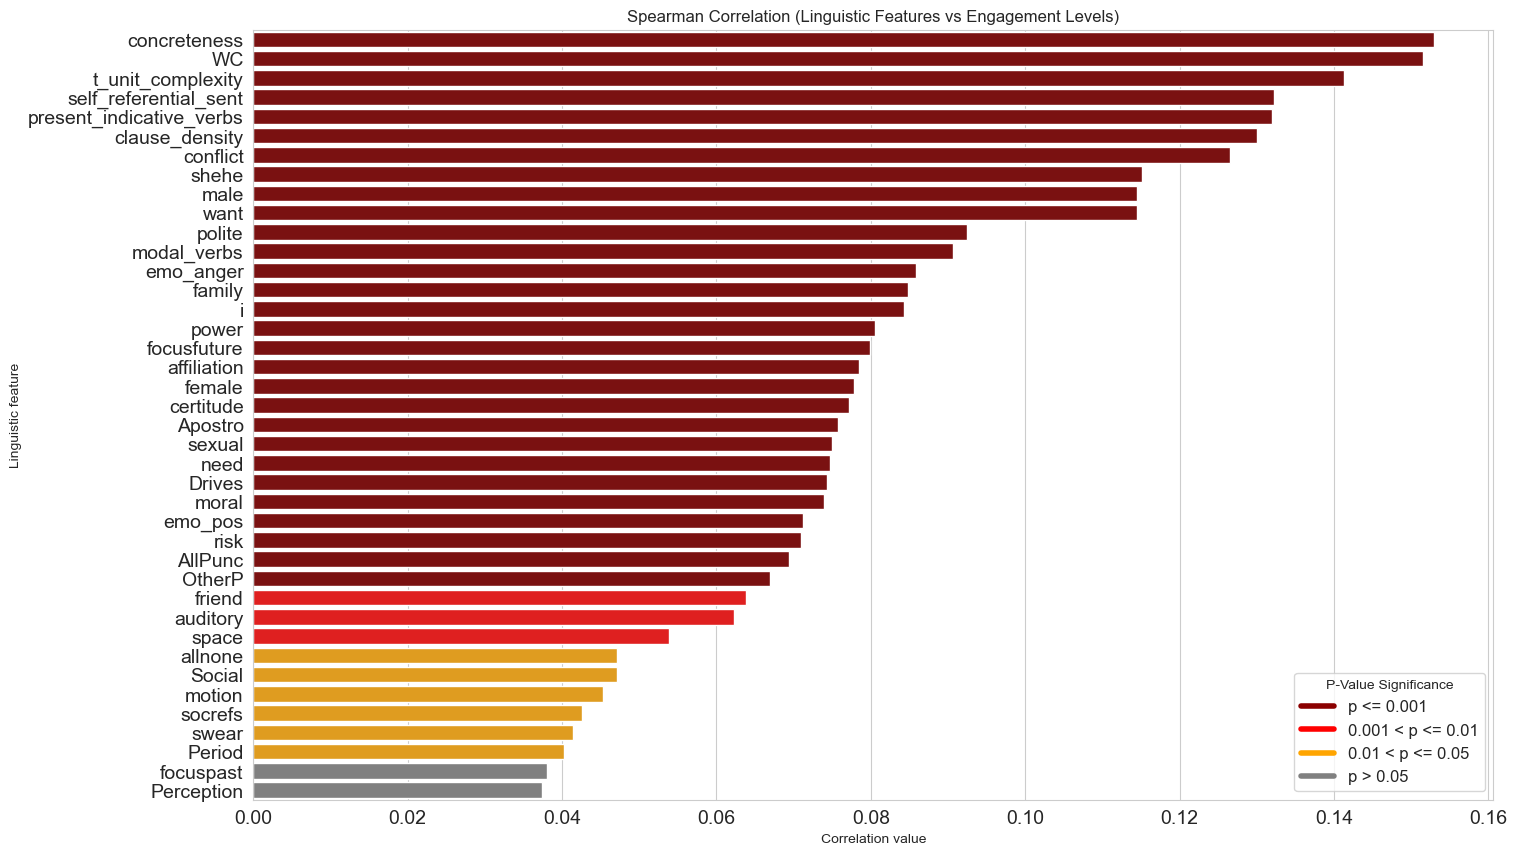

In [350]:
import numpy as np

# Define p-value significance levels and corresponding colors
p_value_significance = [(0.001, 'darkred'), (0.01, 'red'), (0.05, 'orange'), (1, 'gray')]  # Add more levels as needed
colors = [color for _, color in p_value_significance]

# Assign significance level colors to each row in the dataframe
results_df_corr['P-value_color'] = np.select(
    [results_df_corr['P-value'] <= p for p, _ in p_value_significance],
    colors,
    default='gray'
)

# Sort the dataframe based on correlation
results_df_corr = results_df_corr.sort_values(by='Correlation', ascending=False)

# Create the bar plot
plt.figure(figsize=(16, 10))
ax = sns.barplot(x=results_df_corr.Correlation, y=results_df_corr.Column[:40], palette=results_df_corr['P-value_color'])

# Adding titles and labels for clarity
plt.title('Spearman Correlation (Linguistic Features vs Engagement Levels)')
plt.xlabel('Correlation value')
plt.ylabel('Linguistic feature')
plt.tick_params(labelsize=14)

# Create a legend for p-value significance levels
legend_labels = ['p <= 0.001', '0.001 < p <= 0.01', '0.01 < p <= 0.05', 'p > 0.05']
legend_colors = [color for _, color in p_value_significance] + ['gray']
# Add the legend
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, title='P-Value Significance', loc='lower right', fontsize=12)

# Show the plot
plt.show()